In [1]:
from riotwatcher import LolWatcher, ApiError
import pandas as pd

# golbal variables
api_key = 'RGAPI-1ef34321-3440-4b77-844d-438244e36066'
watcher = LolWatcher(api_key)
my_region = 'na1'

me = watcher.summoner.by_name(my_region, 'Desuuuuuuuuuu')

latest = watcher.data_dragon.versions_for_region(my_region)['n']['champion']
static_champ_list = watcher.data_dragon.champions(latest, False, 'en_US')
my_matches = watcher.match.matchlist_by_account(my_region, me['accountId'])

{'id': '0PW5u1m9A8MlqQeyK7KAbqLHL0jZ02ZKKLPjDzc_Kg-PuS4', 'accountId': 'IRHjY5_aOEQhIEMlR7AaytoNDjfgtZmVCUSRammJm_k5oNo', 'puuid': 'OdqABu3N7uTJCY-H9MUJfJw4Q8ATsTPs7riU_aN3i3x4A8_szDoWxHcz5OfSOFE0CiSYXSP1FmUNMg', 'name': 'Desuuuuuuuuuu', 'profileIconId': 673, 'revisionDate': 1587017183000, 'summonerLevel': 82}


In [5]:
def matchHistory(num):

    last_match = my_matches['matches'][num]
    match_detail = watcher.match.by_id(my_region, last_match['gameId'])
    participantsID = []
    for r_name in match_detail['participantIdentities']:
        participants = []
        for row in match_detail['participants']:
            if(r_name['player']['summonerName'] == "Desuuuuuuuuuu"):
                p_name = {}
                p_name['name'] = r_name['player']['summonerName']
                p_name['time elapsed in minutes'] = match_detail['gameDuration']/60
                participants_row = {}
                participants_row['champion'] = row['championId']
                participants_row['kills'] = row['stats']['kills']
                participants_row['win'] = row['stats']['win']
                participants_row['deaths'] = row['stats']['deaths']
                participants_row['kill assists'] = row['stats']['assists']
                participants_row['totalDamageDealt'] = row['stats']['totalDamageDealt']
                participants_row['totalMinionsKilled'] = row['stats']['totalMinionsKilled']
                participants.append(participants_row)
                participantsID.append(p_name)
                
                champ_dict = {}
                for key in static_champ_list['data']:
                    row = static_champ_list['data'][key]
                    champ_dict[row['key']] = row['id']
                for row in participants:
                    row['champion'] = champ_dict[str(row['champion'])]    
                    
                df = pd.DataFrame(participants)
                dg = pd.DataFrame(participantsID)
                
                df_mer = pd.concat([dg,df], axis = 1, sort = False)
                return df_mer

In [6]:
p = pd.DataFrame()
for i in range(100):   
    d = pd.DataFrame(data = matchHistory(i))
    p = pd.concat([d,p])
p.to_csv('league.csv')

# Extra Code


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('league.csv')
data.head()

,Unnamed: 0,name,time elapsed in minutes,champion,deaths,kill assists,kills,totalDamageDealt,totalMinionsKilled,win
0,0,Desuuuuuuuuuu,16.050000,Nasus,7,6,6,83681,79,False
1,0,Desuuuuuuuuuu,18.433333,Brand,8,10,30,108036,71,True
2,0,Desuuuuuuuuuu,25.916667,Shyvana,10,19,29,354330,244,True
3,0,Desuuuuuuuuuu,15.100000,Ryze,6,3,5,69239,96,False
4,0,Desuuuuuuuuuu,24.950000,Azir,16,7,19,161101,144,False


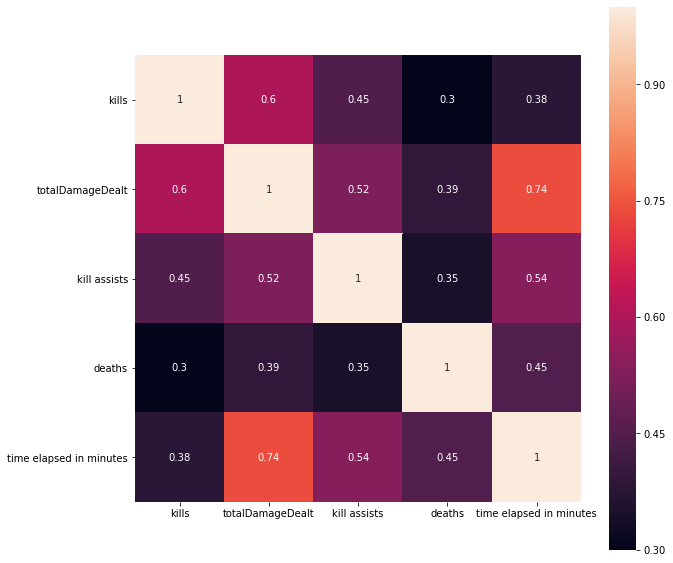

In [18]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data[['kills','totalDamageDealt', 'kill assists', 'deaths', 'time elapsed in minutes']].corr(),annot=True,square=True)

In [24]:
from sklearn.model_selection import train_test_split
X = data[['kills', 'kill assists', 'deaths']]
y = data['win']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Chue\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.86      0.75      0.80        16
        True       0.79      0.88      0.83        17

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33

